### 1. Background of problem

Predict the relationship between the years of experience and income of professionals in the financial industry, and plot the linear regression curve. Notably, it is required to establish both a univariate linear regression equation and a univariate quadratic regression equation, and analyze and compare the R-squared values of the prediction models.

### 2. Data processing

In [1]:
import pandas as pd
df = pd.read_excel('Salary of the financial industry.xlsx')
df.head()  # 显示前5行数据

,Working years,Salary
0,0.0,9534
1,0.1,11667
2,0.2,11015
3,0.3,10347
4,0.3,11110


In [2]:
X = df[['Working years']]
Y = df['Salary']

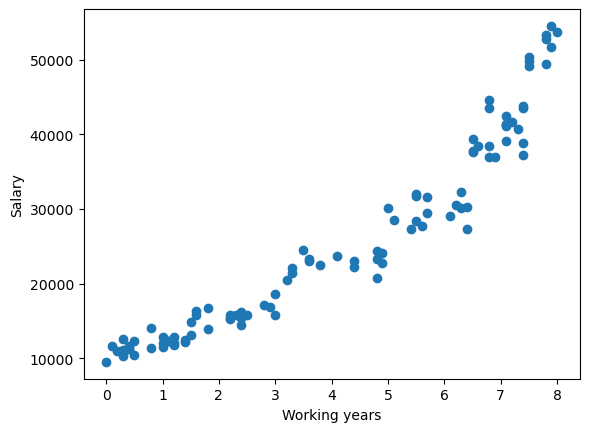

In [3]:
# Visualize the distribution of raw data
from matplotlib import pyplot as plt  # pip install matplotlib
plt.scatter(X,Y)
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.show()

### 3. Regression

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

# 1. Univariate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, Y)
linear_predictions = linear_model.predict(X)
linear_r2 = r2_score(Y, linear_predictions)
linear_coeff = linear_model.coef_[0]
linear_intercept = linear_model.intercept_

print("Linear Regression")
print(f"y = {linear_coeff}x + {linear_intercept}")
print("r^2 =",linear_r2)

Linear Regression
y = 4792.243152511083x + 6269.706619146589
r^2 = 0.9047522073969682


In [5]:
# 2. Univariate Quadratic Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

quadratic_model = LinearRegression()
quadratic_model.fit(X_poly, Y)
quadratic_predictions = quadratic_model.predict(X_poly)
quadratic_r2 = r2_score(Y, quadratic_predictions)
quadratic_coeff = quadratic_model.coef_
quadratic_intercept = quadratic_model.intercept_

print("Quadratic Regression")
print(f"y = {quadratic_coeff[1]}x^2 - {-quadratic_coeff[0]}x + {quadratic_intercept}")
print("r^2 =",quadratic_r2)

Quadratic Regression
y = 611.8072409537132x^2 - 154.72510423942387x + 12138.948662452178
r^2 = 0.955559433189001


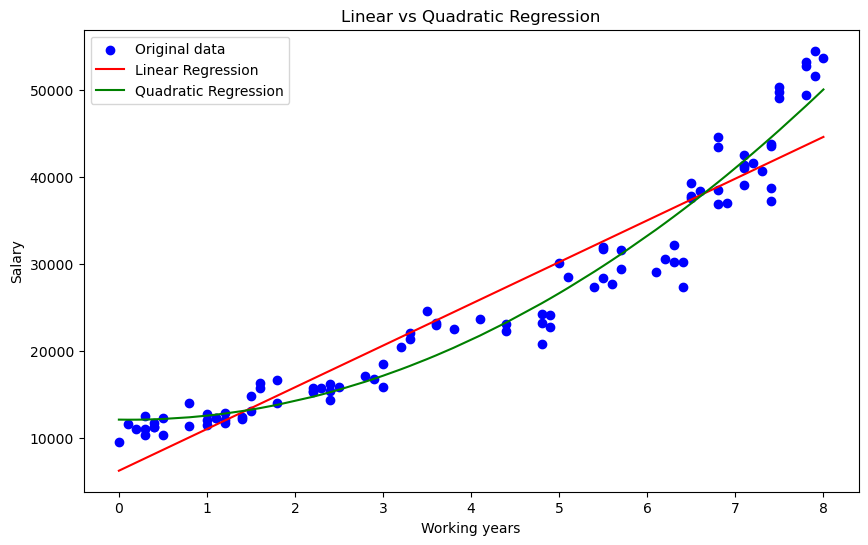

In [6]:
# Plotting the data and the regression lines
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X, linear_predictions, color='red', label='Linear Regression')
plt.plot(X,quadratic_predictions, color='green', label='Quadratic Regression')

plt.title('Linear vs Quadratic Regression')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [7]:
# L1 Regularization (Lasso)
lasso_model = Lasso(alpha=1.0)  #regularization strength
lasso_model.fit(X, Y)
lasso_predictions = lasso_model.predict(X)
lasso_r2 = r2_score(Y, lasso_predictions)
lasso_coeff = lasso_model.coef_[0]
lasso_intercept = lasso_model.intercept_

print("L1 Regularization")
print(f"y = {lasso_coeff}x + {lasso_intercept}")
print("r^2 =",lasso_r2)

L1 Regularization
y = 4792.094825293529x + 6270.3211388089185
r^2 = 0.9047522065302185


In [8]:
# L2 Regularization (Ridge)
ridge_model = Ridge(alpha=1.0)  #regularization strength
ridge_model.fit(X, Y)
ridge_predictions = ridge_model.predict(X)
ridge_r2 = r2_score(Y, ridge_predictions)
ridge_coeff = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_

print("L2 Regularization")
print(f"y = {ridge_coeff}x + {ridge_intercept}")
print("r^2 =",ridge_r2)

L2 Regularization
y = 4785.145479365584x + 6299.112278988392
r^2 = 0.9047502227468609


In [9]:
# 5. Multiple Linear Regression for the provided data
data_multiple = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [2, 1, 4, 3, 5],
    'Y': [5, 5, 11, 11, 15]
})

X_multiple = data_multiple[['X1', 'X2']]
y_multiple = data_multiple['Y']

multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y_multiple)
multiple_predictions = multiple_model.predict(X_multiple)
multiple_r2 = r2_score(y_multiple, multiple_predictions)

print("r^2 =",multiple_r2)

r^2 = 0.9988179669030733
